In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 16}) 

In [107]:
import os

In [2]:
import numpy as np

In [62]:
from pipe_utils import load_greedy_points, load_data

In [106]:
from evaluate_model import match, wave_sur_many, load_model

In [3]:
from fit import load_fit_data

In [4]:
ls

__pycache__/                rb/
build_rb.py*                rerun-2d-fits.sh
combine_wf_data.py*         run-all-1d.sh
debugging.ipynb             run-all-2d.sh
eg_train_wf_data/           run-all-3d.sh
evaluate_model.py*          seed_wf_data/
example-call-3d.ipynb       test-run/
example-call.ipynb          test-run-3d/
example-coords.txt          test_wf_data/
fit.py*                     testrun-3d/
for-da-meeting.ipynb        tfboard-example.ipynb
gen_ts_data.py*             tfboard-log/
gen_wf_data.py*             train_wf_data/
gen_wf_data_3d_non_prec.py* train_wf_data_0/
generators.py               train_wf_data_1/
one-dim-ouput/              ts/
pipe_utils.py               validation_wf_data/
pycondor/


In [65]:
t, amp, coords = load_data('amp', "one-dim-ouput/train_wf_data/")
_, phase, _ = load_data('phase', "one-dim-ouput/train_wf_data/")

Text(0.5, 0, 'time/M')

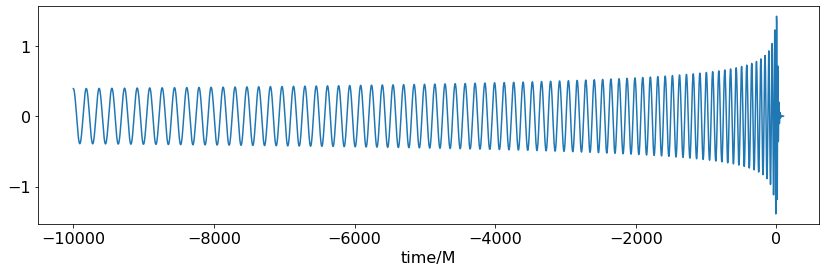

In [90]:
plt.figure(figsize=(14, 4))
plt.plot(t, np.real(amp[0]*np.exp(-1.j * phase[0])))
plt.xlabel('time/M')

In [9]:
greedy_points = load_greedy_points("one-dim-ouput/rb/phase/greedy_points.h5")

In [10]:
greedy_points.shape

(5, 2)

In [52]:
eim_basis = np.load("one-dim-ouput/rb/phase/phase_eim_basis.npy")

In [86]:
eim_basis_nodes = np.load("one-dim-ouput/rb/phase/phase_eim_indices.npy")

In [87]:
eim_basis_nodes.shape

(5,)

In [94]:
eim_basis_nodes

array([4999, 4515, 4948, 2895, 4915])

Text(0.5, 1.0, 'phase')

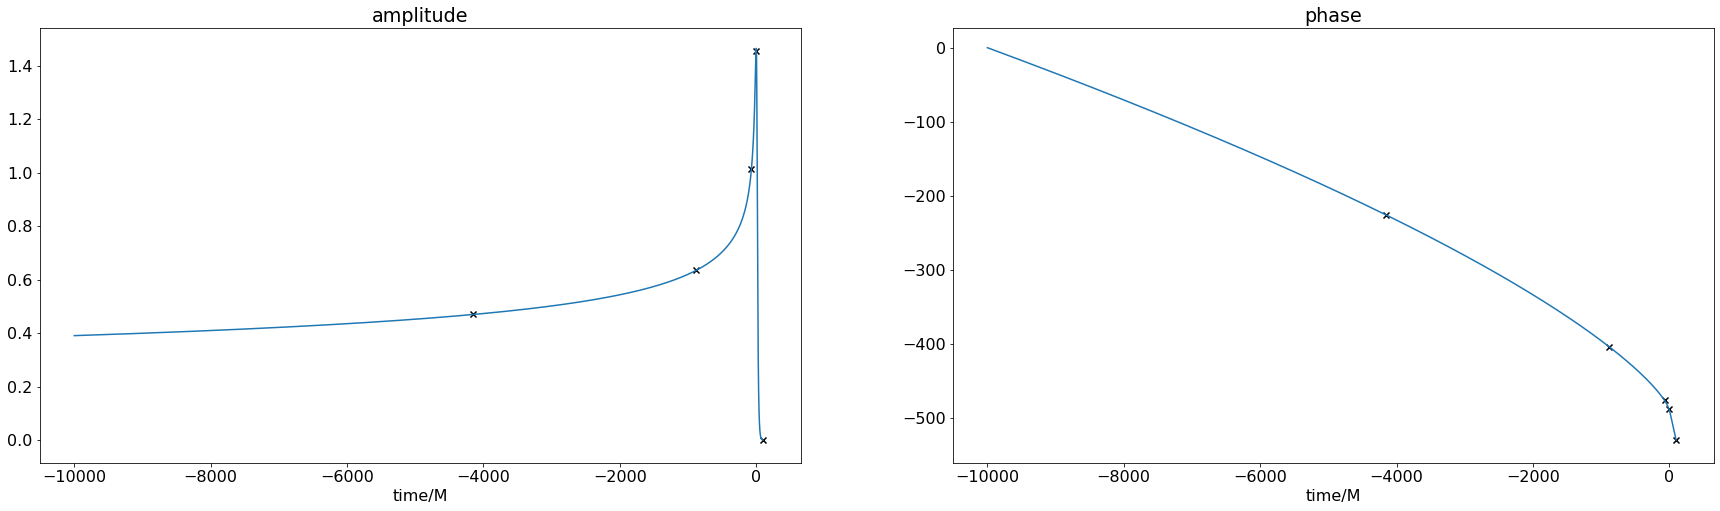

In [105]:
fig, axes = plt.subplots(1, 2, figsize=(30, 8))
axes[0].plot(t, amp[0])
axes[0].scatter(t[eim_basis_nodes], amp[0][eim_basis_nodes], c='k', marker='x')

axes[1].plot(t, phase[0])
axes[1].scatter(t[eim_basis_nodes], phase[0][eim_basis_nodes], c='k', marker='x')

axes[0].set_xlabel('time/M')
axes[1].set_xlabel('time/M')

axes[0].set_title("amplitude")
axes[1].set_title("phase")

In [53]:
eim_basis.shape

(5, 5000)

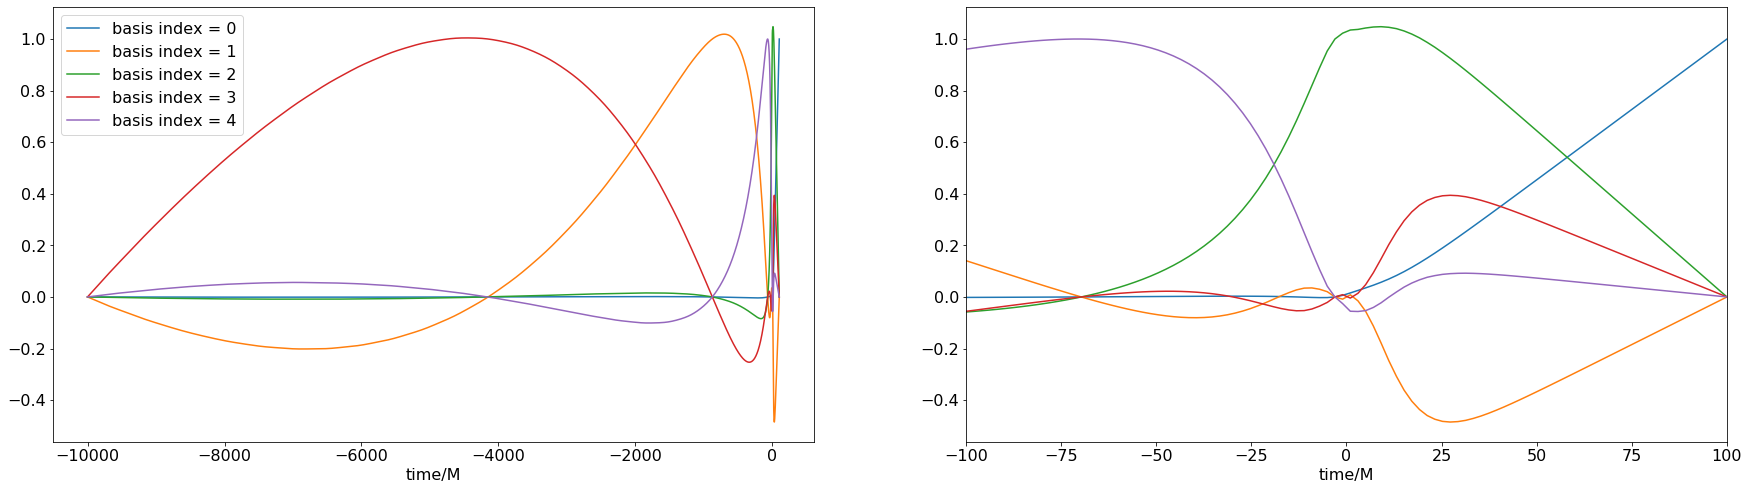

In [85]:
fig, axes = plt.subplots(1, 2, figsize=(30, 8))
for i, eb in enumerate(eim_basis):
    axes[0].plot(t, eb, label=f"basis index = {i}")
    axes[1].plot(t, eb)
axes[0].set_xlabel('time/M')
axes[1].set_xlabel('time/M')
axes[1].set_xlim(-100,100)
axes[0].legend()

In [48]:
X, y = load_fit_data("one-dim-ouput/ts/phase/train/")

In [49]:
X.shape

(1000, 2)

In [50]:
y.shape

(1000, 5)

Text(0.5, 1.0, 'phase at first empirical time node')

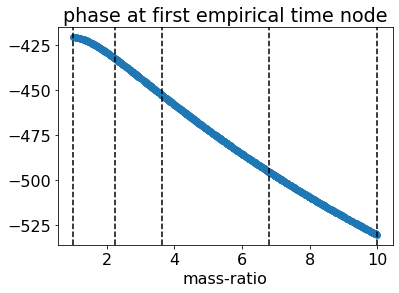

In [51]:
plt.figure()
plt.scatter(np.exp(X[:,0]), y[:,0])
for vl in greedy_points[:,0]:
    plt.axvline(vl, c='k', ls='--')
plt.xlabel('mass-ratio')
plt.title('phase at first empirical time node')

In [108]:
rootdir = 'one-dim-ouput'

In [113]:
phase_basis = os.path.join(rootdir, 'rb/phase/phase_eim_basis.npy')
phase_model_dir = os.path.join(rootdir, 'ts/phase/fits')

In [114]:
phase_model, phase_basis = load_model(
    basis_file=phase_basis,
    nn_weights_file=os.path.join(phase_model_dir, "best.h5"),
    X_scalers_file=os.path.join(phase_model_dir, "X_scalers.npy"),
    Y_scalers_file=os.path.join(phase_model_dir, "Y_scalers.npy"))


In [125]:


qq = np.exp(X[:,0])
qqhat = qq.copy()
cc = np.zeros(len(qq))

pars = np.array(list(zip(qq, cc)))
pars[:,0] = np.log(pars[:,0]) # need to log the mass-ratio

phase_alpha_hat = phase_model.predict(pars)

qq = np.linspace(1, 10, 1000)
cc = np.zeros(len(qq))

pars = np.array(list(zip(qq, cc)))
pars[:,0] = np.log(pars[:,0]) # need to log the mass-ratio

phase_alpha = phase_model.predict(pars)



In [126]:
phase_alpha.shape

(1000, 5)

In [127]:
phase_alpha_hat.shape

(1000, 5)

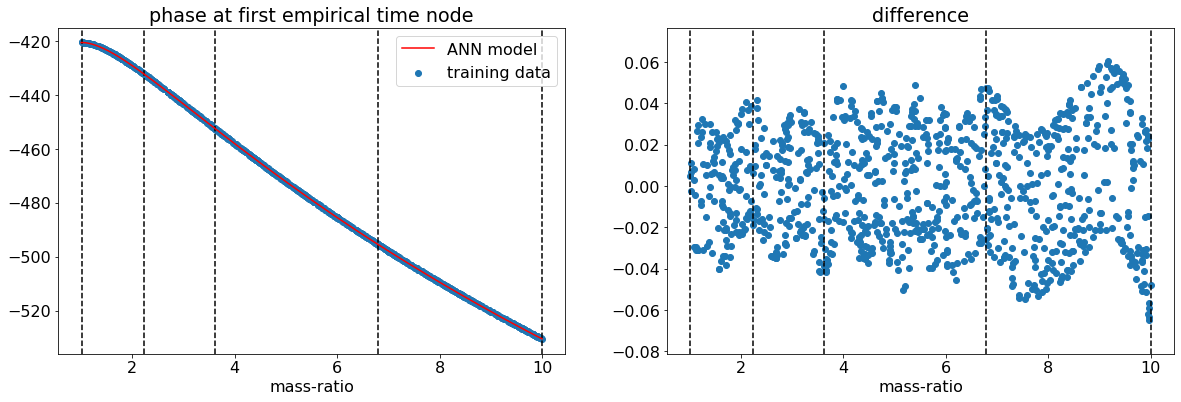

In [140]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
axes[0].scatter(np.exp(X[:,0]), y[:,0], label='training data')
for vl in greedy_points[:,0]:
    axes[0].axvline(vl, c='k', ls='--')
axes[0].plot(qq, phase_alpha[:,0], c='r', label='ANN model')
axes[0].set_xlabel('mass-ratio')
axes[0].set_title('phase at first empirical time node')

axes[1].scatter(np.exp(X[:,0]), y[:,0] - phase_alpha_hat[:,0])
for vl in greedy_points[:,0]:
    axes[1].axvline(vl, c='k', ls='--')
axes[1].set_xlabel('mass-ratio')
axes[1].set_title('difference')
axes[0].legend()